<a href="https://colab.research.google.com/github/johnatanDM/MachineLearning/blob/main/Alura_Rede_Neural_na_m%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports do dataset (carregamento e visualização)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Carregar Dataset

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/johnatanDM/MachineLearning/main/Bicicletas.csv')
dados.head()

,clima,temperatura,bicicletas_alugadas
0,2,0.363625,985
1,2,0.353739,801
2,1,0.189405,1349
3,1,0.212122,1562
4,1,0.229270,1600


(731, 3)


Text(0, 0.5, 'Bicicletas Alugadas')

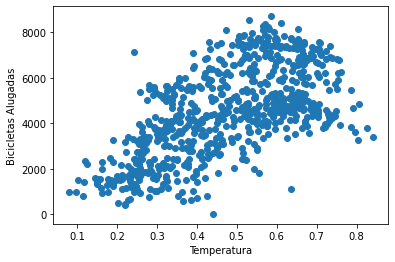

In [ ]:
print(dados.shape)

plt.scatter(dados['temperatura'], dados['bicicletas_alugadas'])
plt.xlabel('Temperatura')
plt.ylabel('Bicicletas Alugadas')

([<matplotlib.axis.XTick at 0x7f5858db4110>,
 <a list of 3 Text major ticklabel objects>)

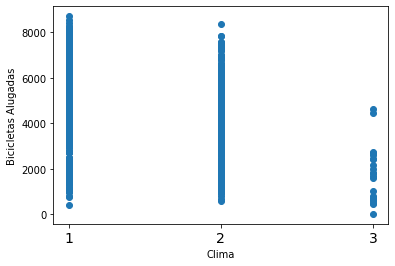

In [ ]:
plt.scatter(dados['clima'], dados['bicicletas_alugadas'])
plt.xlabel('Clima')
plt.ylabel('Bicicletas Alugadas')
indice=[1,2,3]
plt.xticks(indice, fontsize=14)

In [ ]:
y = dados['bicicletas_alugadas'].values

X = dados[['clima','temperatura']].values

print(X)
print(y)

[[2.       0.363625]
 [2.       0.353739]
 [1.       0.189405]
 ...
 [2.       0.2424  ]
 [1.       0.2317  ]
 [2.       0.223487]]
[ 985  801 1349 1562 1600 1606 1510  959  822 1321 1263 1162 1406 1421
 1248 1204 1000  683 1650 1927 1543  981  986 1416 1985  506  431 1167
 1098 1096 1501 1360 1526 1550 1708 1005 1623 1712 1530 1605 1538 1746
 1472 1589 1913 1815 2115 2475 2927 1635 1812 1107 1450 1917 1807 1461
 1969 2402 1446 1851 2134 1685 1944 2077  605 1872 2133 1891  623 1977
 2132 2417 2046 2056 2192 2744 3239 3117 2471 2077 2703 2121 1865 2210
 2496 1693 2028 2425 1536 1685 2227 2252 3249 3115 1795 2808 3141 1471
 2455 2895 3348 2034 2162 3267 3126  795 3744 3429 3204 3944 4189 1683
 4036 4191 4073 4400 3872 4058 4595 5312 3351 4401 4451 2633 4433 4608
 4714 4333 4362 4803 4182 4864 4105 3409 4553 3958 4123 3855 4575 4917
 5805 4660 4274 4492 4978 4677 4679 4758 4788 4098 3982 3974 4968 5312
 5342 4906 4548 4833 4401 3915 4586 4966 4460 5020 4891 5180 3767 4844
 5119 4744 4010 

In [ ]:
#normalizando
xmax = np.amax(X,axis=0)
X = X/xmax
print(X)

ymax = np.amax(y)
y = y/ymax
print(y)

[[0.66666667 0.43242565]
 [0.66666667 0.42066914]
 [0.33333333 0.22524188]
 ...
 [0.66666667 0.28826395]
 [0.33333333 0.27553942]
 [0.66666667 0.26577246]]
[0.11303649 0.09192105 0.15480835 0.17925178 0.18361258 0.18430112
 0.17328437 0.11005279 0.09433096 0.15159513 0.14493918 0.13334863
 0.16134955 0.16307092 0.14321781 0.13816846 0.11475786 0.07837962
 0.18935047 0.2211384  0.17707138 0.11257746 0.11315125 0.16249713
 0.22779435 0.05806748 0.04946064 0.13392242 0.12600413 0.12577462
 0.17225155 0.15607069 0.1751205  0.17787468 0.19600643 0.11533165
 0.18625201 0.19646546 0.17557953 0.18418637 0.17649759 0.20036723
 0.16892357 0.18235024 0.21953179 0.20828552 0.24271288 0.28402571
 0.33589626 0.1876291  0.20794124 0.12703695 0.1663989  0.21999082
 0.20736745 0.16766123 0.22595823 0.27564838 0.16593987 0.2124168
 0.24489328 0.193367   0.22308928 0.23835208 0.06942851 0.21482672
 0.24477852 0.21700711 0.07149415 0.22687629 0.24466376 0.27736975
 0.23479458 0.23594216 0.25154923 0.31489

Funções de ativação

In [ ]:
def sigmoid(Soma):
  return 1/(1+np.exp(-Soma))

def relu(Soma):
  return np.maximum(0,Soma)

Estrutura da Rede Neural

In [ ]:
arquitetura = [
               {"dim_entrada" : 2,
                "dim_saida" : 50,
                "ativacao" : "relu"},
               {"dim_entrada" : 50,
                "dim_saida" : 1,
                "ativacao" : "sigmoid"}
]

In [ ]:
def inicia_camadas(arquitetura, seed = 42):
  np.random.seed(seed)

  numero_camadas = len(arquitetura)
  valores_parametros = {}

  for indice, camada in enumerate(arquitetura):
    indice_camada = indice + 1

    tamanho_camada_entrada = camada["dim_entrada"]
    tamanho_camada_saida = camada["dim_saida"]

    valores_parametros['P' + str(indice_camada)] = np.random.randn(tamanho_camada_saida, tamanho_camada_entrada)

    valores_parametros['b' + str(indice_camada)] = np.random.randn(tamanho_camada_saida, 1) *0.1
  return valores_parametros

In [ ]:
def propaga_uma_camada(Ativado_anterior, Pesos_atual, b_atual, ativacao="relu"):
  Saida_atual = np.dot(Pesos_atual, Ativado_anterior) + b_atual

  if ativacao is "relu":
    func_ativacao = relu
  elif ativacao is "sigmoid":
    func_ativacao = sigmoid

  return func_ativacao(Saida_atual), Saida_atual

In [ ]:
def propaga_total(X, valores_parametros, arquitetura):
  memoria = {}
  Ativado_atual = X

  for indice, camada in enumerate(arquitetura):
    indice_camada = indice + 1
    Ativado_anterior = Ativado_atual
    
    func_ativacao_atual = camada["ativacao"]
    
    Pesos_atual = valores_parametros["P" + str(indice_camada)]
    b_atual = valores_parametros["b" + str(indice_camada)]

    Ativado_atual, Saida_atual = propaga_uma_camada(Ativado_anterior, Pesos_atual, b_atual, func_ativacao_atual)

    memoria["A" + str(indice)] = Ativado_anterior
    memoria["Z" + str(indice_camada)] = Saida_atual
  return Ativado_atual, memoria

Rodando a Rede

In [ ]:
valores_parametros = inicia_camadas(arquitetura, seed=42)

y_estimado, memoria = propaga_total(np.transpose(X), valores_parametros, arquitetura)

In [ ]:
y_estimado[0,0] * ymax

8362.497414530078

In [ ]:
y[0] * ymax

985.0000000000001

definindo a função de custo

In [ ]:
def valor_de_custo(Y_predito, Y):
  m = Y_predito.shape[1]

  custo = -1/m * (np.dot(Y, np.log(Y_predito).T) + np.dot(1-Y, np.log(1 - Y_predito).T))

  return np.squeeze(custo)

In [ ]:
def atualiza(valores_parametros, gradientes, arquitetura, taxa_aprendizagem):
  for indice_camada, camada in enumerate(arquitetura, 1):
    valores_parametros["P" + str(indice_camada)] -= taxa_aprendizagem * gradientes["dP" + str(indice_camada)]
    valores_parametros["b" + str(indice_camada)] -= taxa_aprendizagem * gradientes["db" + str(indice_camada)]
  return valores_parametros

In [ ]:
def retropropagacao_total(Y_predito, Y, memoria, valores_parametros, arquitetura):
  gradientes = {}

  Y = Y.reshape(Y_predito.shape)

  dAtivado_anterior = -(np.divide(Y, Y_predito) - np.divide(1-Y, 1-Y_predito))

  for indice_camada_anterior, camada in reversed(list(enumerate(arquitetura))):
    indice_camada_atual = indice_camada_anterior + 1
    funcao_ativacao_atual = camada["ativacao"]

    dAtivado_atual = dAtivado_anterior

    Ativado_anterior = memoria["A" + str(indice_camada_anterior)]
    Saida_atual = memoria["Z" + str(indice_camada_atual)]

    Pesos_atual = valores_parametros["P" + str(indice_camada_atual)]
    b_atual = valores_parametros["b" +str(indice_camada_atual)]

    dAtivado_anterior, dPesos_atual, db_atual = retropropagacao_uma_camada(
        dAtivado_atual, Pesos_atual, b_atual, Saida_atual, Ativado_anterior, funcao_ativacao_atual
        )
    gradientes["dP" + str(indice_camada_atual)] = dPesos_atual
    gradientes["db" + str(indice_camada_atual)] = db_atual

  return gradientes

retropropagação

In [ ]:
def sigmoid_retro(dAtivado, Saida):
  sig = sigmoid(Saida)
  return dAtivado * sig * (1 -sig)

In [ ]:
def relu_retro(dAtivado, Saida):
  dSaida = np.array(dAtivado, copy = True)
  dSaida[Saida <= 0 ] =0
  return dSaida

In [ ]:
def retropropagacao_uma_camada(dAtivado_atual, Pesos_atual, b_atual, Saida_atual, 
                               Ativado_anterior, ativacao="relu"):
  m = Ativado_anterior.shape[1]

  if ativacao is "relu":
    func_ativacao_retro = relu_retro
  elif ativacao is "sigmoid":
    func_ativacao_retro = sigmoid_retro
  else:
    raise Exception("Ainda não implementei essa funcao de ativacao" + ativacao)

  dSaida_atual = func_ativacao_retro(dAtivado_atual, Saida_atual)
  dPesos_atual = np.dot(dSaida_atual, Ativado_anterior.T) / m
  db_atual = np.sum(dSaida_atual, axis=1, keepdims=True) / m
  dAtivado_anterior = np.dot(Pesos_atual.T, dSaida_atual)

  return dAtivado_anterior, dPesos_atual, db_atual

In [ ]:
def treino(X, Y, X_teste, Y_teste, arquitetura, epocas, taxa_aprendizagem):
  valores_parametros = inicia_camadas(arquitetura, 42)
  historia_custo = []
  historia_custo_teste = []
  for i in range(epocas):
    Y_predito, memoria = propaga_total(X, valores_parametros, arquitetura)

    Y_predito_teste, memoria2 = propaga_total(X_teste, valores_parametros, arquitetura)

    custo = valor_de_custo(Y_predito, Y)
    historia_custo.append(custo)
    custo_teste = valor_de_custo(Y_predito_teste, Y_teste)
    historia_custo_teste.append(custo_teste)

    gradientes = retropropagacao_total(Y_predito, Y, memoria,
                                       valores_parametros, arquitetura)
    valores_parametros = atualiza(valores_parametros, gradientes, arquitetura,
                                  taxa_aprendizagem)
    if (i % 50):
      print("Iteração: {:05} - custo: {:.5f}".format(i,custo))
  return valores_parametros, historia_custo, historia_custo_teste 

Separando dados treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
valores_parametros, historia_custo, historia_custo_teste = treino(np.transpose(X_treino), np.transpose(y_treino.reshape(y_treino.shape[0],1)),
      np.transpose(X_teste), np.transpose(y_teste.reshape(y_teste.shape[0],1)),
       arquitetura, 20000, 0.01)

A saída de streaming foi truncada nas últimas 5000 linhas.
Iteração: 14898 - custo: 0.64211
Iteração: 14899 - custo: 0.64211
Iteração: 14901 - custo: 0.64211
Iteração: 14902 - custo: 0.64211
Iteração: 14903 - custo: 0.64211
Iteração: 14904 - custo: 0.64211
Iteração: 14905 - custo: 0.64211
Iteração: 14906 - custo: 0.64211
Iteração: 14907 - custo: 0.64211
Iteração: 14908 - custo: 0.64211
Iteração: 14909 - custo: 0.64211
Iteração: 14910 - custo: 0.64211
Iteração: 14911 - custo: 0.64211
Iteração: 14912 - custo: 0.64211
Iteração: 14913 - custo: 0.64211
Iteração: 14914 - custo: 0.64211
Iteração: 14915 - custo: 0.64211
Iteração: 14916 - custo: 0.64211
Iteração: 14917 - custo: 0.64211
Iteração: 14918 - custo: 0.64211
Iteração: 14919 - custo: 0.64211
Iteração: 14920 - custo: 0.64211
Iteração: 14921 - custo: 0.64211
Iteração: 14922 - custo: 0.64211
Iteração: 14923 - custo: 0.64211
Iteração: 14924 - custo: 0.64211
Iteração: 14925 - custo: 0.64211
Iteração: 14926 - custo: 0.64211
Iteração: 14927 -

Text(0.5, 0, 'épocas')

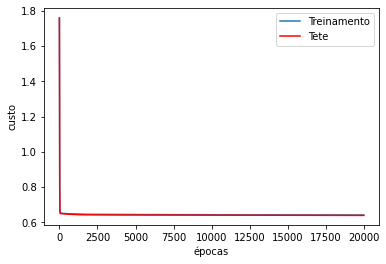

In [ ]:
plt.plot(historia_custo)
plt.plot(historia_custo_teste, 'r')
plt.legend(['Treinamento', 'Tete'])
plt.ylabel('custo')
plt.xlabel('épocas')

Testando a rede

In [45]:
Y_predito, _ = propaga_total(np.transpose(X_teste), valores_parametros, arquitetura)

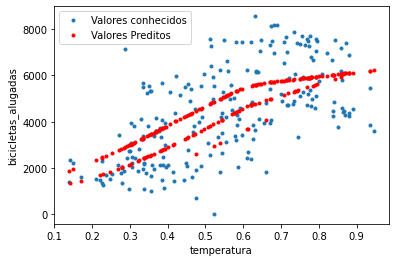

In [46]:
plt.plot(np.transpose(X_teste)[1], ymax*y_teste, '.')
plt.plot(np.transpose(X_teste)[1], ymax*Y_predito.reshape([-1,1]), '.r')
plt.legend(['Valores conhecidos', 'Valores Preditos'])
plt.ylabel('bicicletas_alugadas')
plt.xlabel('temperatura')
plt.show()

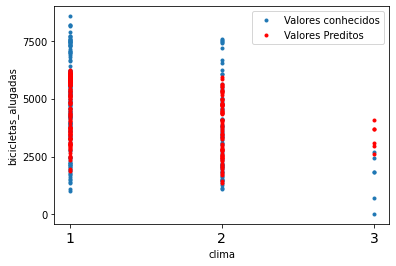

In [48]:
plt.plot(3*np.transpose(X_teste)[0], ymax*y_teste, '.')
plt.plot(3*np.transpose(X_teste)[0], ymax*Y_predito.reshape([-1,1]), '.r')
plt.legend(['Valores conhecidos', 'Valores Preditos'])
plt.ylabel('bicicletas_alugadas')
plt.xlabel('clima')
plt.rcParams.update({'font.size': 22})
indice=[1,2,3]
plt.xticks(indice, fontsize=14)
plt.show()